# Polynomial regression

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


[]

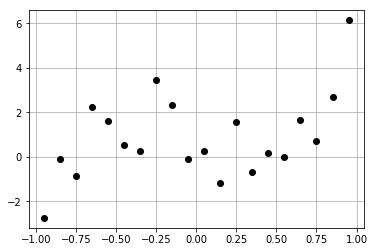

In [7]:
x,y = np.loadtxt('ex5_data.csv',delimiter=',',unpack=True)
plt.plot(x,y,'ok')
plt.grid()
plt.plot()

[]

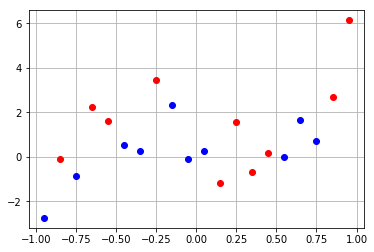

In [8]:
x_trn = x[::2] # 0,2,4,6,...
y_trn = y[::2]

x_tst = x[1::2] # 1,3,5,7,...
y_tst = y[1::2]

plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob')

plt.grid()
plt.plot()

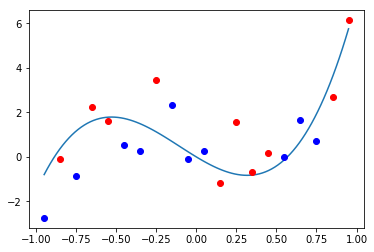

In [9]:



d=3
def design_matrix(x, d):
    N = len(x)
    x = x.reshape(-1, 1)
    X = np.zeros((N, d))
    p = np.arange(d) + 1
    X = (X + x) ** p
    return X
def linear_regression(X, y):
    # your code here..
    C = np.dot(np.transpose(X), X)
    u = np.dot(np.transpose(X), y)
    w = np.dot(np.linalg.inv(C), u)

    return w

X=design_matrix(x_trn,d)
w= linear_regression(X,y_trn)
x1=np.linspace(np.min(x),np.max(x),100)
X1=design_matrix(x1,d)
h=np.dot(X1,w)
plt.plot(x1,h)
plt.plot(x_trn,y_trn,'or',x_tst,y_tst,'ob')
plt.show()

### Over-fitting

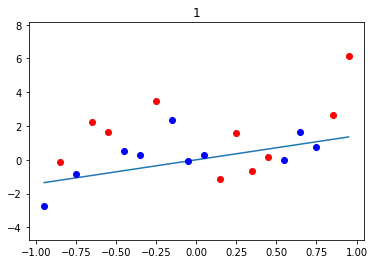

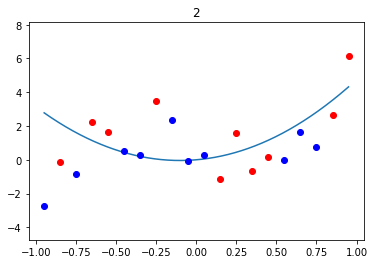

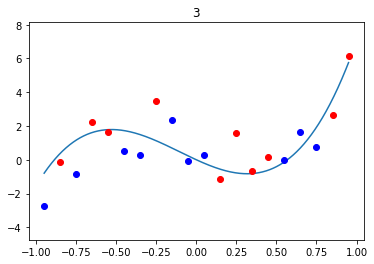

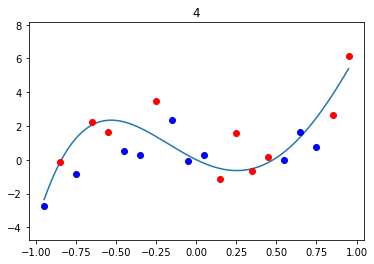

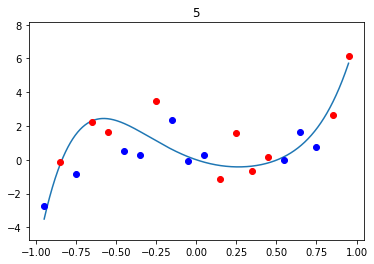

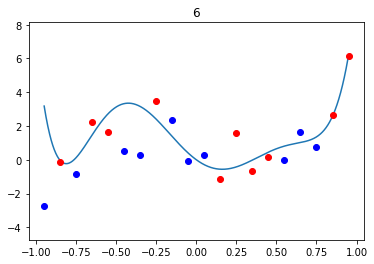

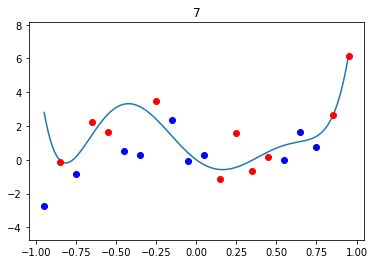

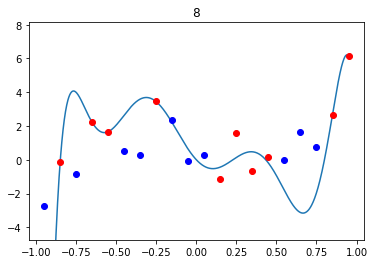

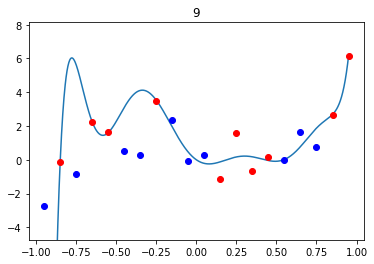

In [10]:
n=9
d=1
x1=np.linspace(np.min(x),np.max(x),1000)
#x1=x1[:,None]
while d< n+1:
    X=design_matrix(x_trn,d)
#     w,j=gradient_descent(X,y_trn)
    w=linear_regression(X,y_trn)
    X1=design_matrix(x1,d)
    h=np.dot(X1,w)
#     h_tst=np.dot(X,w)
    plt.figure(d)
    plt.plot(x1,h)
    plt.title(d)
    plt.ylim(y.min()-2,y.max()+2)
    plt.plot(x_tst,y_tst,'ob')
    plt.plot(x_trn,y_trn,'or')
    plt.show()
    d+=1

# Cross-validation

In [11]:
polynomial=9; d=1; J_trnT=[]; J_tstT=[];

while d< polynomial +1:
 A = np.random.permutation(np.transpose(np.loadtxt('ex5_data.csv', delimiter=',', unpack=True)))
 B = (np.loadtxt('ex5_data.csv', delimiter=',', unpack=True))
 C = np.transpose(A)
 x,y=C
 x_trn = x[0:15]
 y_trn = y[0:15]

 x_tst = x[15:20]
 y_tst = y[15:20]
 def design_matrix(x, d):
    N = len(x)
    x = x.reshape(-1, 1)
    X = np.zeros((N, d))
    p = np.arange(d) + 1
    X = (X + x) ** p
    return X
 def linear_regression(X, y):
    # your code here..
    C = np.dot(np.transpose(X), X)
    u = np.dot(np.transpose(X), y)
    w = np.dot(np.linalg.inv(C), u)
    return w
#trn
 X=design_matrix(x_trn,d)
 w= linear_regression(X,y_trn)
 h_trn=np.dot(X,w)
 e_trn= np.sum((h_trn-y_trn)**2)*(1/4)
 J_trnT.append(e_trn)

#tst
 X=design_matrix(x_tst,d)
 w= linear_regression(X,y_tst)
 h_tst= np.dot(X,w)
 e_tst= np.sum( (h_tst-y_tst)**2)*(1/4)
 J_tstT.append(e_tst)

 d+=1



print('J_trn total:')
print(J_trnT,'\n')
print('J_tst total:')
print(J_tstT,'\n')
j=0
mini=np.min(J_tstT)
for i in J_tstT:
  if i == mini:
    D=j
  j+=1

print('the best value of d is : %s'%D)

J_trn total:
[15.732024741650877, 10.851945132853217, 3.0574961703935126, 3.9866129326119171, 4.5542232060897359, 2.6197455207419602, 4.0874738969683717, 3.0820661819423667, 3.3205077634058604] 

J_tst total:
[2.3801230344626596, 0.42196851183382372, 1.7963527124288032, 0.94005594927177705, 4.3069225104680135e-21, 0.3672942001865539, 756.85594713856551, 40.232020774737009, 3.2731054350932141] 

the best value of d is : 4
